In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
T = 10
    
inds0 = np.arange(0, T-1)
inds = np.arange(1, T)

print(inds0)
print(inds)

[0 1 2 3 4 5 6 7 8]
[1 2 3 4 5 6 7 8 9]


In [6]:
for i in range(1, 10):
    print(i)

1
2
3
4
5
6
7
8
9


In [7]:
a = np.ones(9)
b=  np.zeros(10)
b[1:] = a
print(b)

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
print(b[:-1])

[0. 1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
def addParams(mat:np.array, params:np.array):
    """ 
    Function to add some given parameters to all
    instances of the arary (3 dims) (add it in last dimension)

    NOTE: used for adding the radius of the cells (need change if different radius)
    Args:
    ----
        - `mat` (np.array): feature array
        - `params` (np.array): array to add at the end of 3rd dimension

    Retunrs:
    --------
        concatenated array
    """
    
    p = np.repeat(params.reshape(1, -1), mat.shape[0] * mat.shape[1], axis = 0).reshape(mat.shape[0], mat.shape[1], -1)
    res = np.concatenate((mat, p), axis = -1)
    return res

In [15]:
a = np.zeros((10, 20, 5))
b = np.array([12])

c = addParams(a, b)

In [20]:
print(c[:,4])

[[ 0.  0.  0.  0.  0. 12.]
 [ 0.  0.  0.  0.  0. 12.]
 [ 0.  0.  0.  0.  0. 12.]
 [ 0.  0.  0.  0.  0. 12.]
 [ 0.  0.  0.  0.  0. 12.]
 [ 0.  0.  0.  0.  0. 12.]
 [ 0.  0.  0.  0.  0. 12.]
 [ 0.  0.  0.  0.  0. 12.]
 [ 0.  0.  0.  0.  0. 12.]
 [ 0.  0.  0.  0.  0. 12.]]


In [28]:
def MSD_comp(traj, tau):
    T = traj.shape[0]
    i = np.arange(T - tau)
    j = i + tau

    return np.linalg.norm(traj[j, :, :] - traj[i, :, :], axis=-1)**2

def MSD(traj: np.array)-> np.array:
    """
    Allows to compute the Mean Squared Displacement of the trajectories for all timestamps
    
    Args:
    -----
    - `traj`: np.array of N trajectories of length T [NxT]
    
    Output:
    -------
    Mean Squared Displacement for all timestamps
    """

    res = []
    T = traj.shape[0]
    
    for tau in range(1, T):
        val = np.mean(np.mean(MSD_comp(traj, tau), axis=0), axis=0)
        res.append(val)

    return res

a = np.random.random((100, 20, 2))

r = MSD(a)

In [29]:
print(len(r))

99


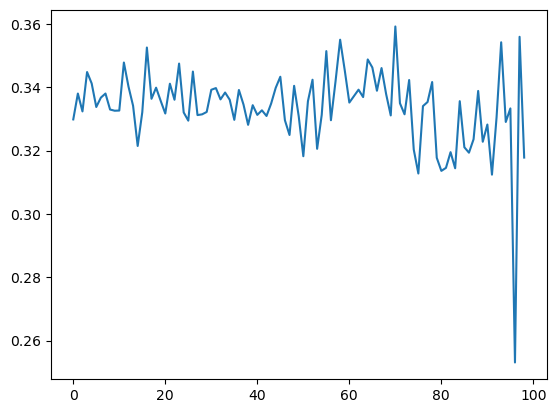

In [31]:
plt.plot(r)

In [32]:

# possible to get the transitions that are ok for each timesteps
# then play with a dictionnary to keep all of that [frame, cells, pos]

a = np.random.random((100, 45, 2))
sim = a
bound = 0.5

In [44]:
inds = np.all(np.where(sim < bound, 1, 0).reshape(-1, 2), axis = -1)
print(np.sum(inds))
print(100*45*2)

1191
9000


In [46]:
b = a.reshape(-1, 2)[inds]
print(b)

[[0.15493974 0.04371424]
 [0.48834617 0.25078492]
 [0.17676664 0.30779784]
 ...
 [0.32887937 0.34312687]
 [0.28015598 0.38996803]
 [0.0704348  0.46832302]]
